In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/ds964_nil_wm.zip')
metropolitane = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/tpl_metropercorsi_shp.zip')

1. Visualizzare le linee della metropolitana che passano in un quartiere inserito dall'utente.

In [ ]:
quartieri = quartieri.to_crs(epsg = 4326)

In [ ]:
metro_quar = geopandas.sjoin(metropolitane, quartieri, how = 'inner')
metro_quar

,linea,mezzo,percorso,nome,lung_km,num_ferm,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,1,METRO,100002,BISCEGLIE - SESTO 1 MAGGIO FS,16.38,27,"LINESTRING (9.11291 45.45539, 9.11648 45.45607...",49,19,PADOVA - TURRO - CRESCENZAGO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7801.535584,2.061867e+06,138
1,1,METRO,100013,MOLINO DORINO - SESTO 1 MAGGIO FS,19.18,29,"LINESTRING (9.09291 45.50522, 9.09521 45.50478...",49,19,PADOVA - TURRO - CRESCENZAGO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7801.535584,2.061867e+06,138
2,1,METRO,100023,QT8 - SESTO 1 MAGGIO FS,15.07,24,"LINESTRING (9.13713 45.48595, 9.14363 45.47922...",49,19,PADOVA - TURRO - CRESCENZAGO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7801.535584,2.061867e+06,138
3,1,METRO,100030,RHO FIERAMILANO - SESTO 1 MAGGIO FS,21.16,31,"LINESTRING (9.08710 45.51981, 9.08653 45.51680...",49,19,PADOVA - TURRO - CRESCENZAGO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7801.535584,2.061867e+06,138
4,1,METRO,100033,SESTO 1 MAGGIO FS - BISCEGLIE,16.38,27,"LINESTRING (9.23834 45.54170, 9.23672 45.54001...",49,19,PADOVA - TURRO - CRESCENZAGO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7801.535584,2.061867e+06,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,5,METRO,100089,SAN SIRO STADIO - BIGNAMI,12.18,19,"LINESTRING (9.11829 45.47628, 9.12901 45.47620...",81,69,SARPI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6456.320879,1.811846e+06,170
29,5,METRO,100084,BIGNAMI - SAN SIRO STADIO,12.18,19,"LINESTRING (9.21216 45.52675, 9.20941 45.52204...",2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91
30,5,METRO,100089,SAN SIRO STADIO - BIGNAMI,12.18,19,"LINESTRING (9.11829 45.47628, 9.12901 45.47620...",2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91
29,5,METRO,100084,BIGNAMI - SAN SIRO STADIO,12.18,19,"LINESTRING (9.21216 45.52675, 9.20941 45.52204...",53,70,GHISOLFA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4551.676979,1.051412e+06,142


In [ ]:
input_quar = input('Inserire un quartiere: ')
quar = quartieri[quartieri['NIL'] == input_quar]

Inserire un quartiere: PAGANO


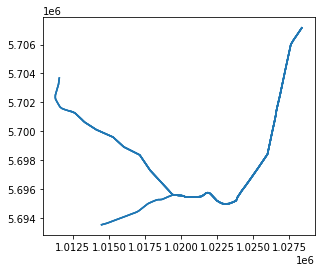

In [ ]:
linee_attr = metropolitane[metropolitane.intersects(quar.geometry.squeeze())]
ax = linee_attr.to_crs(epsg = 3857).plot()

2. Visualizare un elenco dei quartieri ('NIL') con le linee ('linea') che li attraversano.

In [ ]:
# metro_quar[['NIL', 'linea']]

In [ ]:
quartieri = quartieri.to_crs(epsg=4326)

metro_nd = metropolitane.drop_duplicates(subset = ["linea"])

qua_linee = geopandas.sjoin(quartieri, metro_nd, op = "intersects", how = "inner").reset_index()
qua_linee[["NIL", "linea"]].sort_values(by = "NIL")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,NIL,linea
24,AFFORI,3
36,BANDE NERE,1
45,BARONA,2
11,BOVISASCA,3
57,BRERA,2
26,BRERA,3
41,BRERA,1
16,BRUZZANO,3
51,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,2
38,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,1


3. Visualizzare un elenco dei quartieri ('NIL') con il numero di linee della metropolitana che attraversano quel quartiere.
Visualizzare nell'elenco anche i quartieri in cui non passano linee della metropolitana. Ordinare in ordine decrescente sul numero di linee.

In [ ]:
# metro_quar_2 = geopandas.sjoin(metropolitane, quartieri, op = 'within', how = 'outer')

In [ ]:
# metro_quar_2[['NIL', 'linea']].sort_values(by='linea', reverse = True)

4. Visualizzare una mappa della città di Milano con i quartieri colorati in base al numero di linee metropolitane che li attraversano.
Visualizzare anche una legenda per spiegare i colori.

In [ ]:
groupby_mq = metro_quar.groupby('NIL').count()['geometry'].reset_index()

In [ ]:
merge1 = pd.merge(quartieri, groupby_mq, on = 'NIL', how = 'inner')
merge1.rename(columns = {'geometry_x': 'geometry'}, inplace = True)

In [ ]:
# ax = merge1.to_crs(epsg = 3857).plot(figsize = (15, 15), column ='geometry', legend = True)
# contextily.add_basemap(ax)